# Importing necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve,auc 
from sklearn.calibration import calibration_curve
import import_ipynb
from DataPreProcessing import new_df,X,y,X_train, X_test, y_train,y_test,sc

# Training XGBoost model on training set

In [3]:
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

# To Check if the model is overfitting or underfitting

In [4]:
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_test, y_test_pred)

In [5]:
train_accuracy = round(train_accuracy,3)
val_accuracy = round(val_accuracy,3)
print("Training Accuracy:", train_accuracy )
print("Validation Accuracy:",  val_accuracy)


Training Accuracy: 0.999
Validation Accuracy: 0.999


In [6]:
if train_accuracy > val_accuracy:
    print("The model may be overfitting.")
elif train_accuracy < val_accuracy:
    print("The model may be underfitting.")
else:
    print("The model's performance on training and validation sets are similar")


The model's performance on training and validation sets are similar


# Prediciting a new result

In [7]:
classifier.predict([[1,9839.64, 170136.0,160296.36]])

array([1])

In [8]:
classifier.predict([[4,181.00, 181.00,0.00]])

array([1])

# Prediciting the testing values

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
print(np.concatenate((y_pred.reshape(len(y_pred), 1),y_test.reshape(len(y_test), 1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


<h2>Accuracy</h2>


In [11]:
accuracy = accuracy_score(y_test,y_pred)
round(accuracy*100,2)

99.95

# Classification Report

In [12]:
print(classification_report(y_test, y_pred))

'''
0- No Fraud
1- Fraud
'''

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588628
           1       0.84      0.72      0.77      2027

    accuracy                           1.00   1590655
   macro avg       0.92      0.86      0.89   1590655
weighted avg       1.00      1.00      1.00   1590655



'\n0- No Fraud\n1- Fraud\n'

# ROC Curve

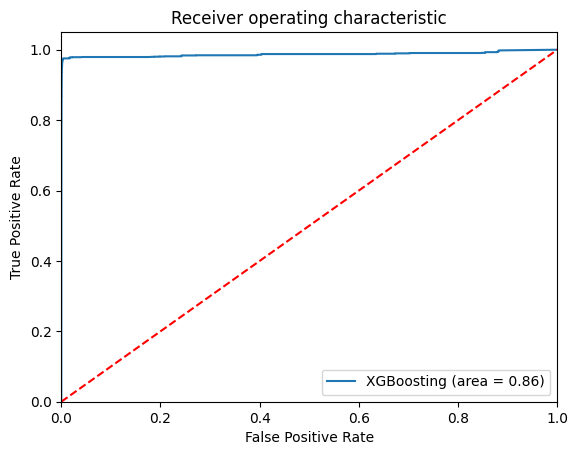

In [13]:
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoosting (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve

AUC-PRC: 0.8522891048730674


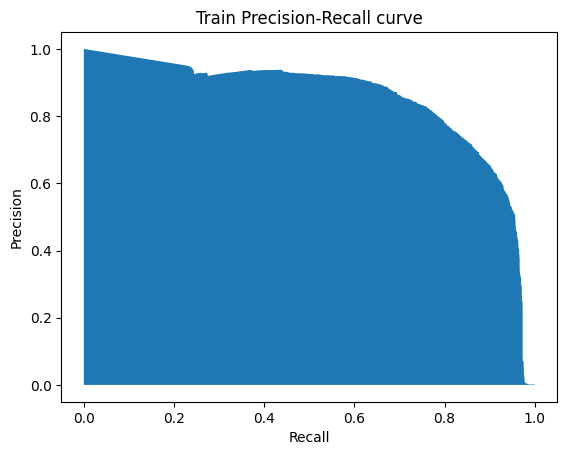

In [14]:
y_prob_train = classifier.predict_proba(X_train)[:,1]
y_prob_test = classifier.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_train, y_prob_train)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");
from sklearn.metrics import precision_recall_curve, auc
auc_prc = auc(recall, precision)
print("AUC-PRC:", auc_prc)
 

# Confusion Matrix

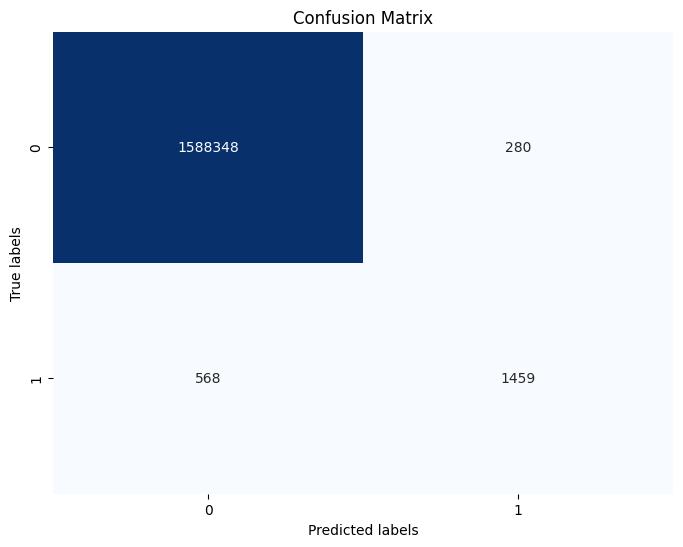

In [15]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Calibration Curve

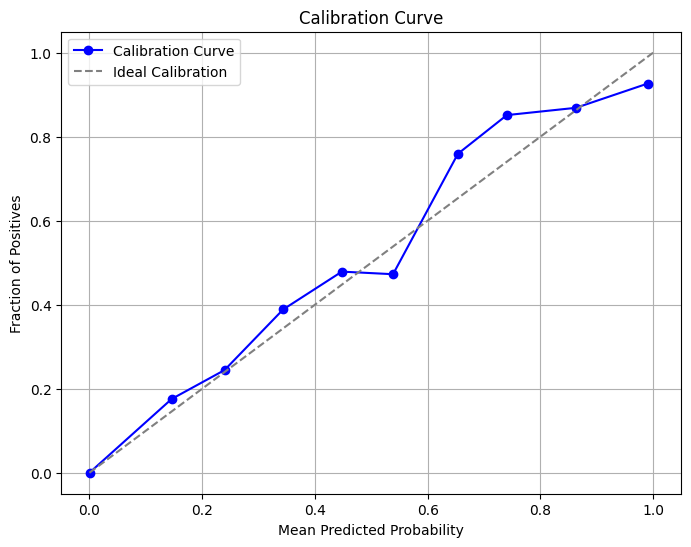

In [16]:
# Predict probabilities on the test set
probabilities = classifier.predict_proba(X_test)[:, 1]

# Compute calibration curve
prob_true, prob_pred = calibration_curve(y_test, probabilities, n_bins=10)

# Plot the calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Calibration Curve', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Ideal Calibration')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()
